# Simulación del fenómeno: pelotas danzantes

In [1]:
# importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
# Definimos las funciones necesarias
def F_chorro(v_c, a_c):
    """
    Funcion que calcula la fuerza de impacto de un chorro de agua sobre una superficie
    v_c: velocidad del chorro de agua al impactar [m/s]
    a_c: area de impacto del chorro de agua [m2]
    """
    RHO = 1000
    return RHO*v_c**2*a_c


def acc(x, R, M, F, alpha=0.0):
    """
    Funcion que calcula la aceleracion de la esfera
    x: posicion del objeto respecto al equilibrio [m]
    R: radio de la esfera [m]
    M: masa del objeto [kg]
    F: fuerza que actua sobre el objeto [N]
    """
    return -3/2*F*np.sin(x/R)/M + F*np.sin(x/R)*np.cos(x/R)/M - alpha*x

In [14]:
# Definimos constantes
R = 2e-2 # Radio de la esfera [m]
M = 3e-3 # Masa de la esfera [kg]
# v_c = 240e-2 # Velocidad del chorro de agua [m/s]
v_c = 1 # Velocidad del chorro de agua [m/s]
R_grifo = 2.2e-2/2 # Radio del grifo [m]
a_c = np.pi*R_grifo**2 # Area de impacto del chorro de agua [m2]
F_c = F_chorro(v_c, a_c) # Fuerza de impacto del chorro de agua [N]
alpha = 0 # "Coeficiente de amortiguamiento"

# Definimos parametros iniciales y de simulación
dt = 2e-3 # Paso de tiempo [s]
t0 = 0 # Tiempo inicial [s]
x0 = R/2 # Posicion inicial [m]
v0 = 0 # Velocidad inicial [m/s]
a0 = acc(x0, R, M, F_c, alpha) # Aceleracion inicial [m/s2]
t_max = 1 # Tiempo maximo de simulacion [s]

# Definimos listas para guardar los datos
t = [t0]
x = [x0]
v = [v0]
a = [a0]

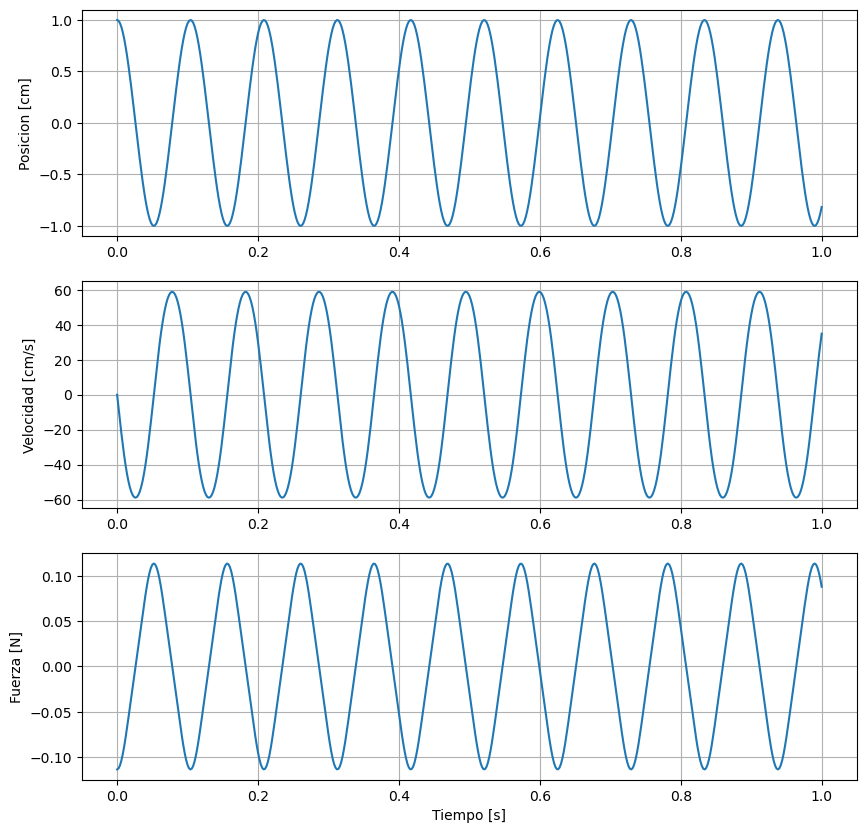

In [15]:
# Realizamos la simulacion
while t[-1] < t_max:
    x.append(x[-1] + v[-1]*dt + 0.5*a[-1]*dt**2)
    v.append(v[-1] + 0.5*(a[-1] + acc(x[-1], R, M, F_c, alpha))*dt)
    # v.append(v[-1] + a[-1]*dt)
    a.append(acc(x[-1], R, M, F_c, alpha))
    t.append(t[-1] + dt)
F = [a_i*M for a_i in a]

# Graficamos los resultados
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(t, np.array(x)*1e2, label='Posicion')
# ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Posicion [cm]')
# ax[0].legend()
ax[0].grid()
ax[1].plot(t, np.array(v)*1e2, label='Velocidad')
# ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Velocidad [cm/s]')
# ax[1].legend()
ax[1].grid()
ax[2].plot(t, F, label='Fuerza')
ax[2].set_xlabel('Tiempo [s]')
ax[2].set_ylabel('Fuerza [N]')
# ax[2].legend()
ax[2].grid()
plt.show()


Ajuste de la simulación a una función coseno

In [16]:
# Definimos la función coseno de ajuste
def coseno(x, A, w, phi):
    return A*np.cos(w*x + phi)

# Ajustamos la función coseno a los datos de la posición
popt, pcov = curve_fit(coseno, t, x, p0=[R/2, 2*np.pi*9.5, 0])
A, w, phi = popt
print('A = {:.3f} +- {:.3f} m'.format(A, np.sqrt(pcov[0,0])))
print('w = {:.3f} +- {:.3f} rad/s'.format(w, np.sqrt(pcov[1,1])))
print('phi = {:.3f} +- {:.3f} rad'.format(phi, np.sqrt(pcov[2,2])))

A = 0.010 +- 0.000 m
w = 60.295 +- 0.001 rad/s
phi = 0.000 +- 0.000 rad


In [17]:
print("Frecuencia = {:.3f} Hz".format(w/(2*np.pi)))

Frecuencia = 9.596 Hz


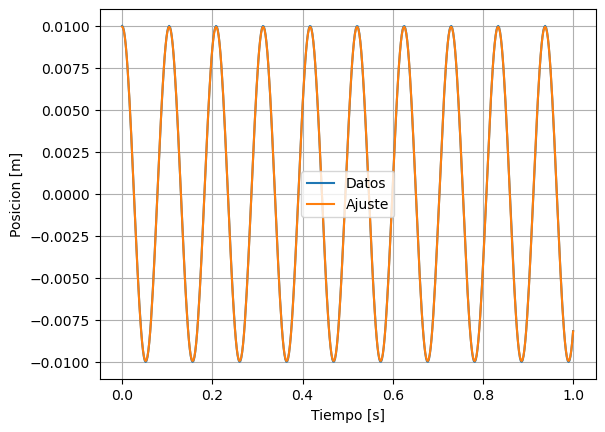

In [18]:
# Graficamos los resultados del ajuste y los datos
fig, ax = plt.subplots()
ax.plot(t, x, label='Datos')
ax.plot(t, coseno(np.array(t), *popt), label='Ajuste')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Posicion [m]')
ax.legend()
ax.grid()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


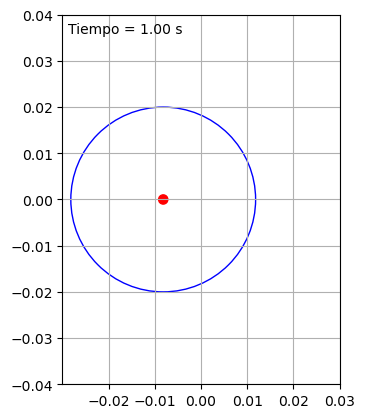

In [19]:
# Animación de la posición de la esfera
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

# Definimos la figura y los ejes
fig, ax = plt.subplots()
ax.set_xlim(min(x)-R, max(x)+R)
ax.set_ylim(-R*2, R*2)
ax.set_aspect('equal')
ax.grid()

# Definimos el objeto a animar
esfera = plt.Circle((0, 0), R, color='b', fill=False)
punto = plt.Circle((0, 0), R/20, color='r', fill=True)
ax.add_artist(esfera)
ax.add_artist(punto)

# Agregamos un texto con el tiempo de simulación
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Función de inicialización de la animación
def init():
    esfera.center = (0, 0)
    punto.center = (0, 0)
    time_text.set_text('')
    return esfera, punto, time_text,

# Función de animación
def animate(i):
    esfera.center = (x[i],0)
    punto.center = (x[i],0)
    time_text.set_text('Tiempo = {:.2f} s'.format(t[i]))
    return esfera, punto, time_text,

# Creamos la animación y la guardamos como gif
ani = animation.FuncAnimation(fig, animate, frames=int(len(x)), init_func=init, blit=True)
ani.save('esfera.gif', writer='imagemagick', fps=30)
plt.show()